# Introduction 

- Term Deposits are a major source of income for a bank. 
- A term deposit is a cash investment held at a financial institution. 
- The bank has various outreach plans to sell term deposits to their customers such as:
    - Email Marketing
    - Advertisements
    - Telephonic Marketing
    - Your money is invested for an agreed rate of interest over a fixed amount of time, or term. 
    - Digital Marketing



# Problem Statement

- Telephonic marketing campaigns still remain one of the most effective way to reach out to 
people. 
- Telephonic marketing require huge investment as large call centers are hired to actually 
execute these campaigns. 
- Hence, it is crucial to identify the customers most likely to convert beforehand so that they 
can be specifically targeted via call.



# Objective

#### The goal is to predict if the client will subscribe to a term deposit (variable y)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
filepath = r"TermDeposit.xlsx"

port_fi = pd.read_excel(filepath)
port_fi.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Checking for null and duplicate values

In [3]:
port_fi.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
port_fi[port_fi.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


#### Findings:
- No null or duplicate values present in the dataset

## Exploring the Dataset

In [5]:
port_fi.shape

(45211, 17)

In [6]:
port_fi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
port_fi.select_dtypes(object)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


<function matplotlib.pyplot.show(close=None, block=None)>

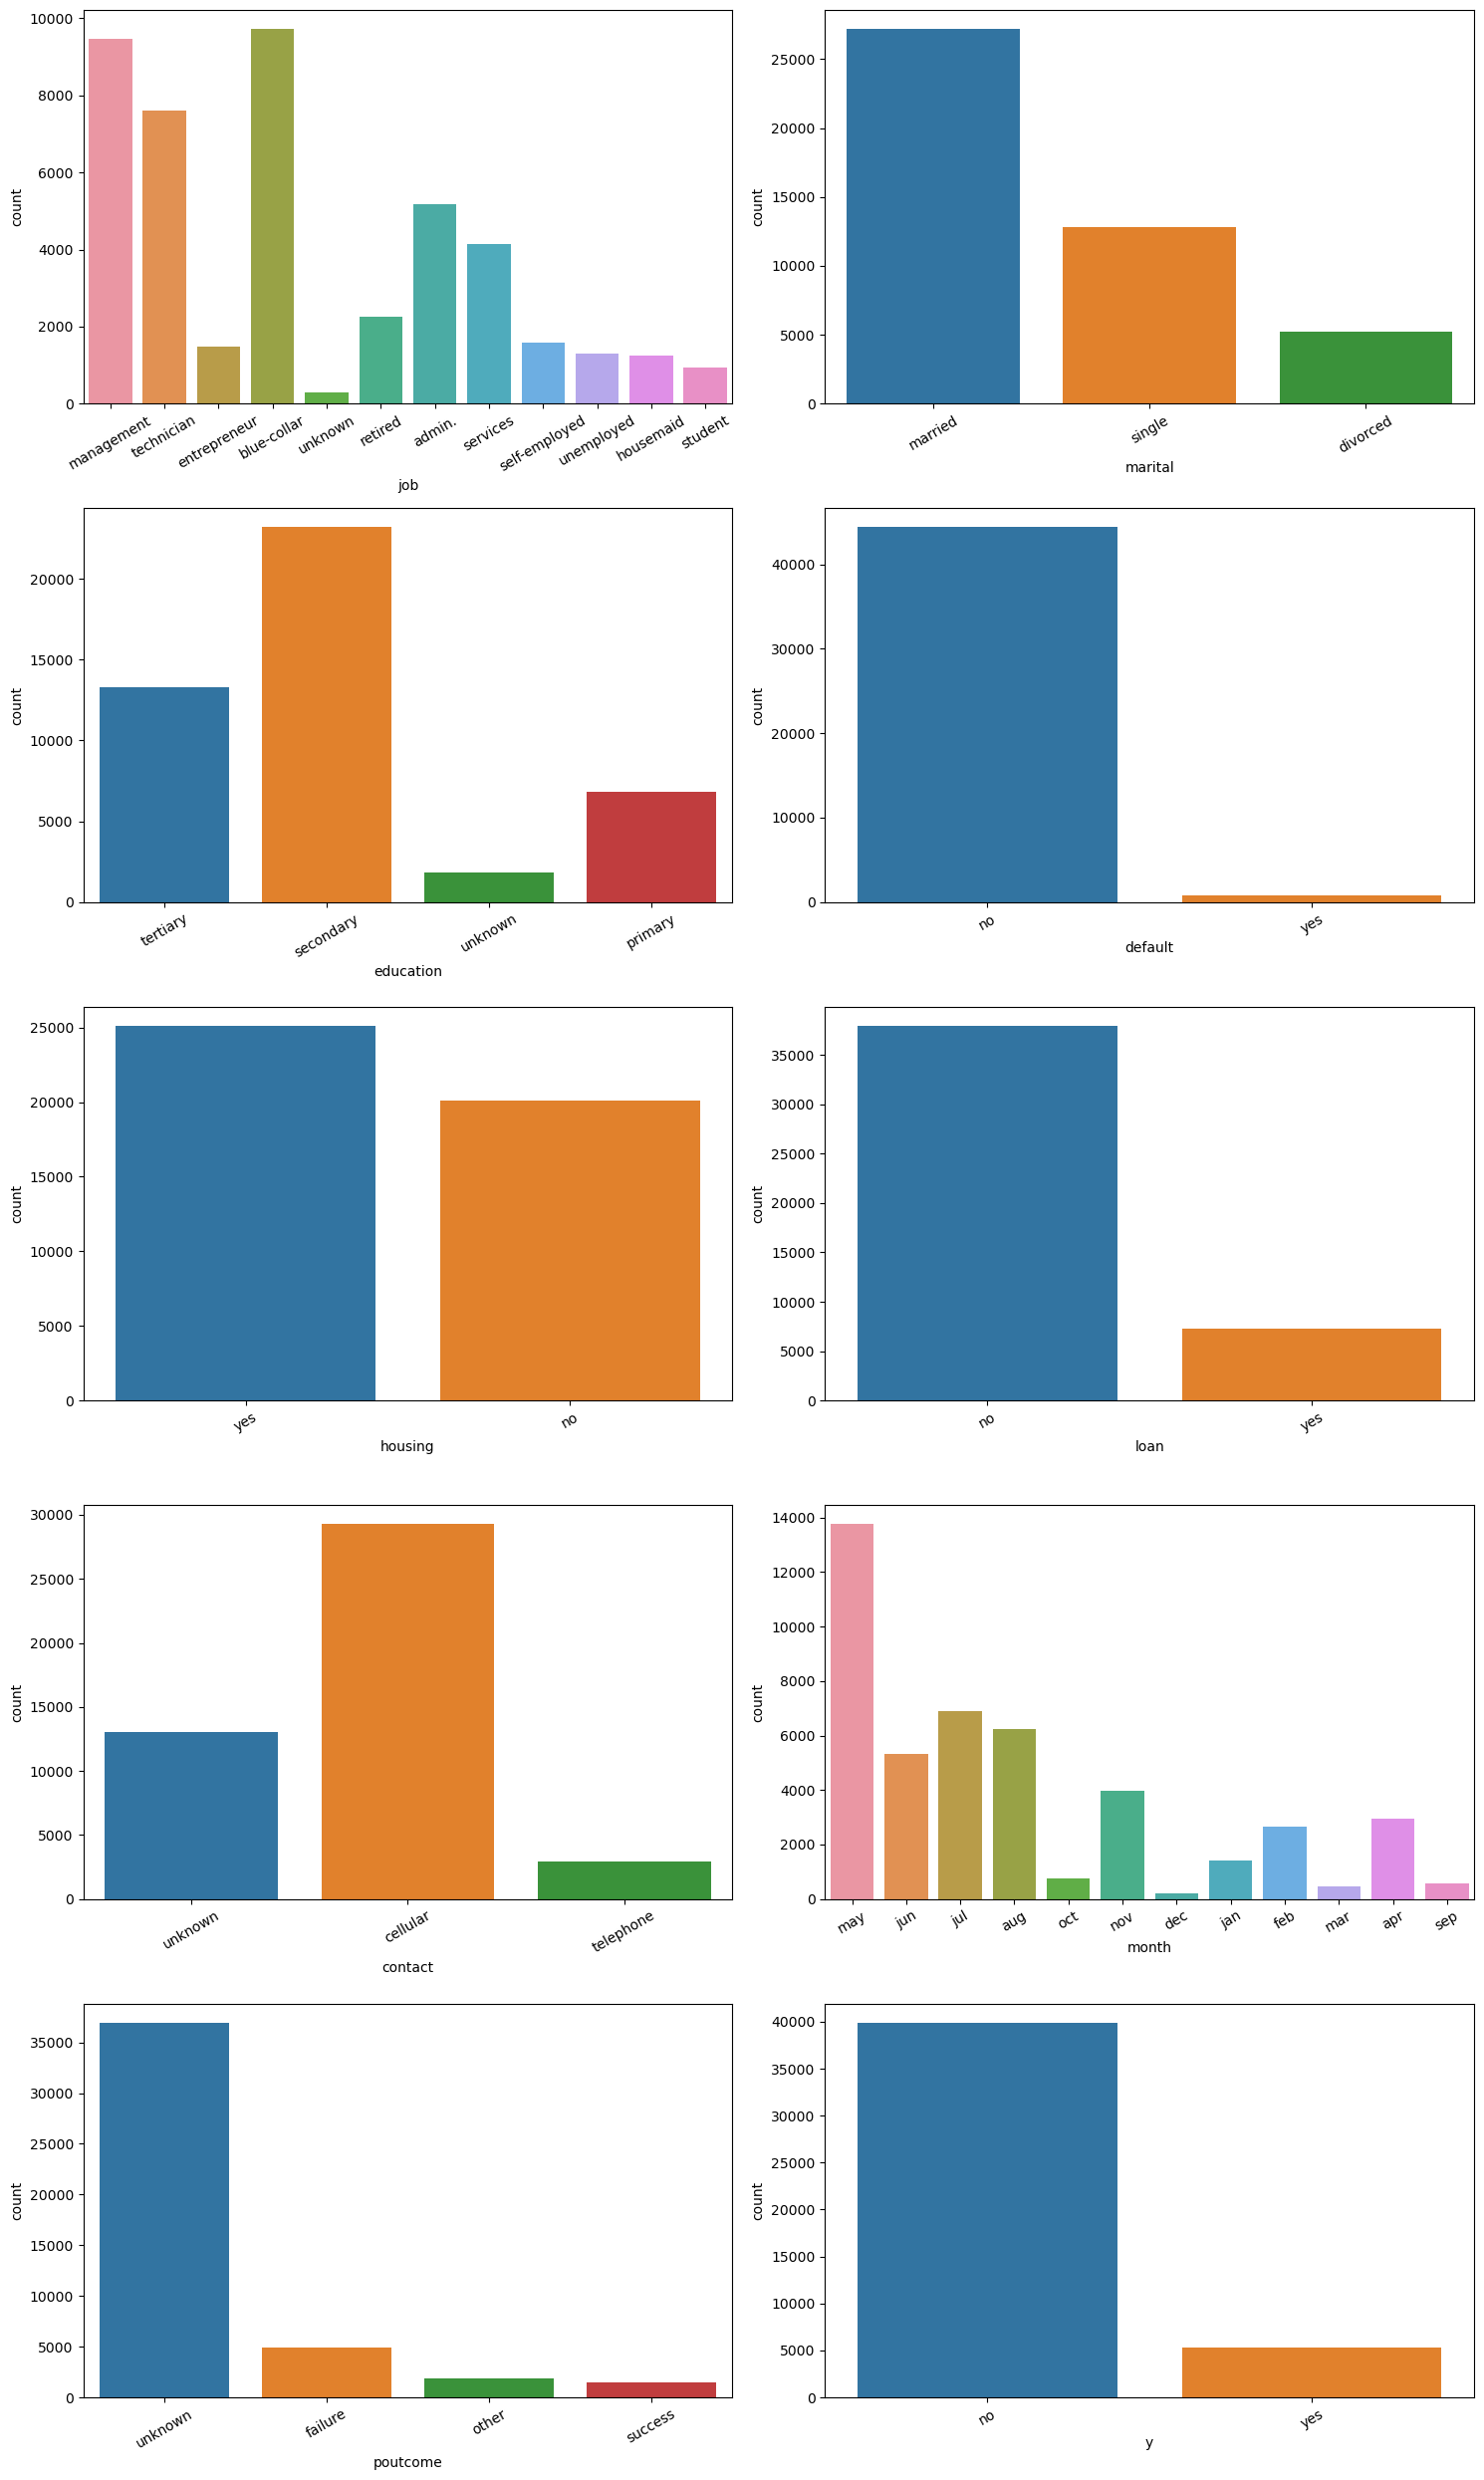

In [8]:
plt.figure(figsize=(15,25))

cat_cols = port_fi.select_dtypes(include=object).columns

for index, column in enumerate(cat_cols, start=1):
    plt.subplot(int((len(cat_cols)/2)), 2, index)
    sns.countplot(x=column, data=port_fi)
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show

### Observations

1. Most people belong to the blue-collar profession with management being a close second.
2. Most people are married.
3. Most people have a secondary level of education with tertiary being second.
4. Most people don't have default in their credit.
5. Most people have a housing loan.
6. Most people don't have a housing loan.
7. Most people have been contacted via cellular with unknown being second probably includes emails, targetted ads, in-person, etc and telephone being the least preferred, however, we can combine the cellular and telephone to a single column.
8. Customers were reached out most in the month of May.
9. A large number of previous outcome is unknown.

In [9]:
port_fi.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


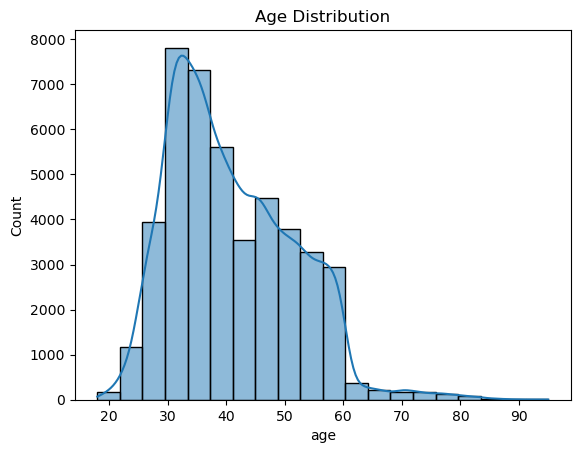

In [10]:
sns.histplot(data=port_fi, x='age', kde=True, bins=20)

plt.title("Age Distribution")
plt.show()

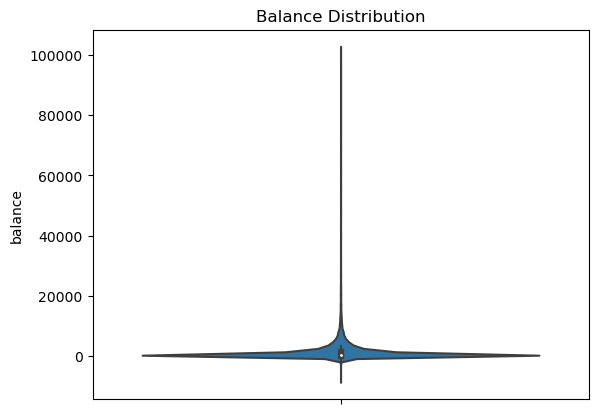

In [11]:
sns.violinplot(data=port_fi, y='balance', kde=True)

plt.title("Balance Distribution")
plt.show()

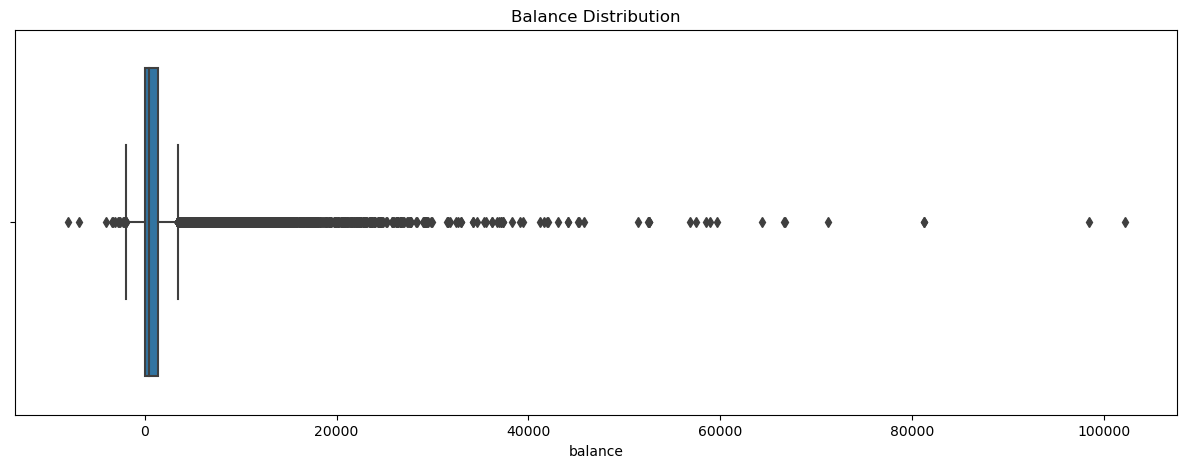

In [12]:
plt.figure(figsize=(15,5))
sns.boxplot(data=port_fi, x='balance')

plt.title("Balance Distribution")
plt.show()

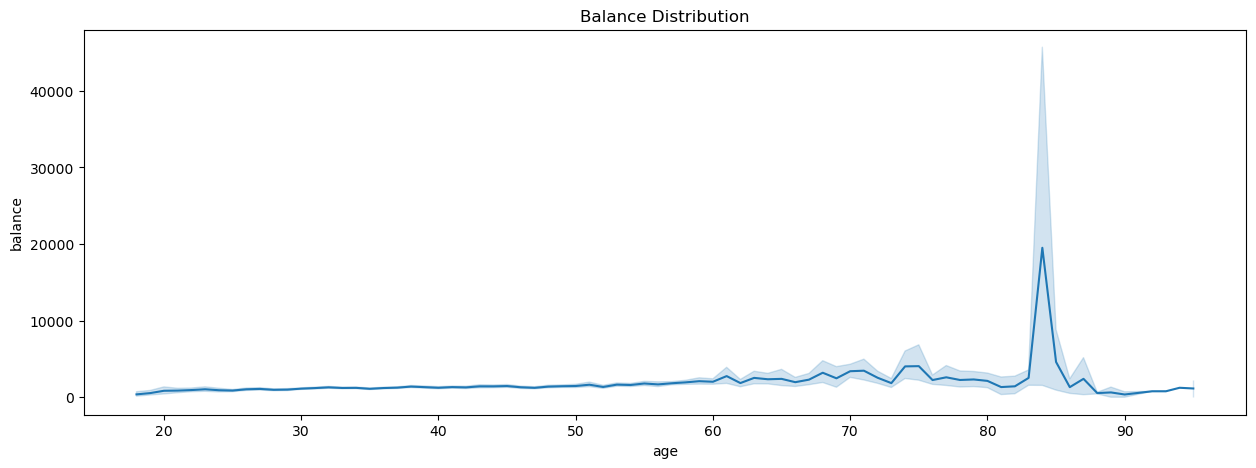

In [13]:
plt.figure(figsize=(15,5))
sns.lineplot(x='age', y='balance', data=port_fi)

plt.title("Balance Distribution")
plt.show()

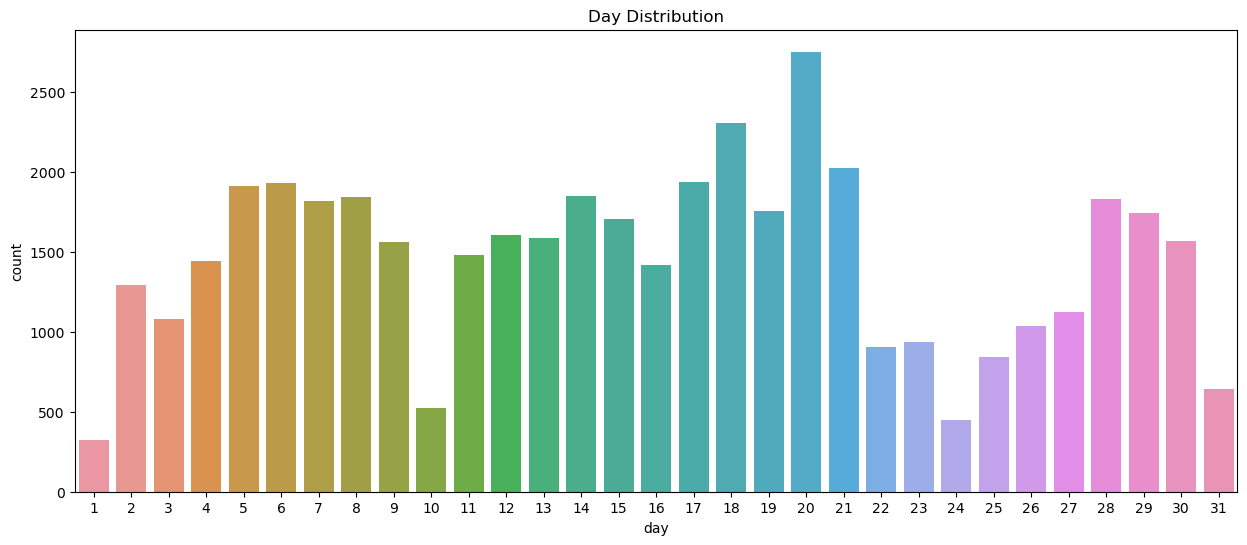

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(data=port_fi, x='day')

plt.title("Day Distribution")
plt.show()

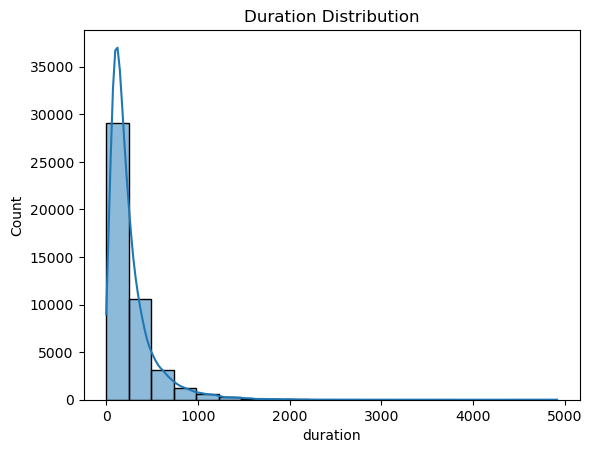

Min Call Duration: 0.0 minutes
Max Call Duration: 81.97 minutes
Average Call Duration: 4.3 minutes


In [15]:
sns.histplot(data=port_fi, x='duration', kde=True, bins=20)

plt.title("Duration Distribution")
plt.show()

print(f"Min Call Duration: {round(port_fi['duration'].min()/60,2)} minutes")
print(f"Max Call Duration: {round(port_fi['duration'].max()/60,2)} minutes")
print(f"Average Call Duration: {round(port_fi['duration'].mean()/60,2)} minutes")

### Observations

1. The age distribution is positively skewed with the average age being at 41 years old.
2. The balance column seems to have quite a few outliers with majority of them being on the higher side.
3. If we'll see the relation between age and balance there seems to be a gradual increase in the balance beginning from the age of 50 and a spike between the ages of 80 and 90, indicating the highest amount of bank balance a person has is between that age.
4. The day of the month with the highest number of people contacted during the last contact is the 20th day.
5. The call duration is also positively skewed with the average, minimum and maximum call duration being 4.3 minutes, 0.0 minutes and 81.97 minutes. 

### Now I want to examine the relationship between different features

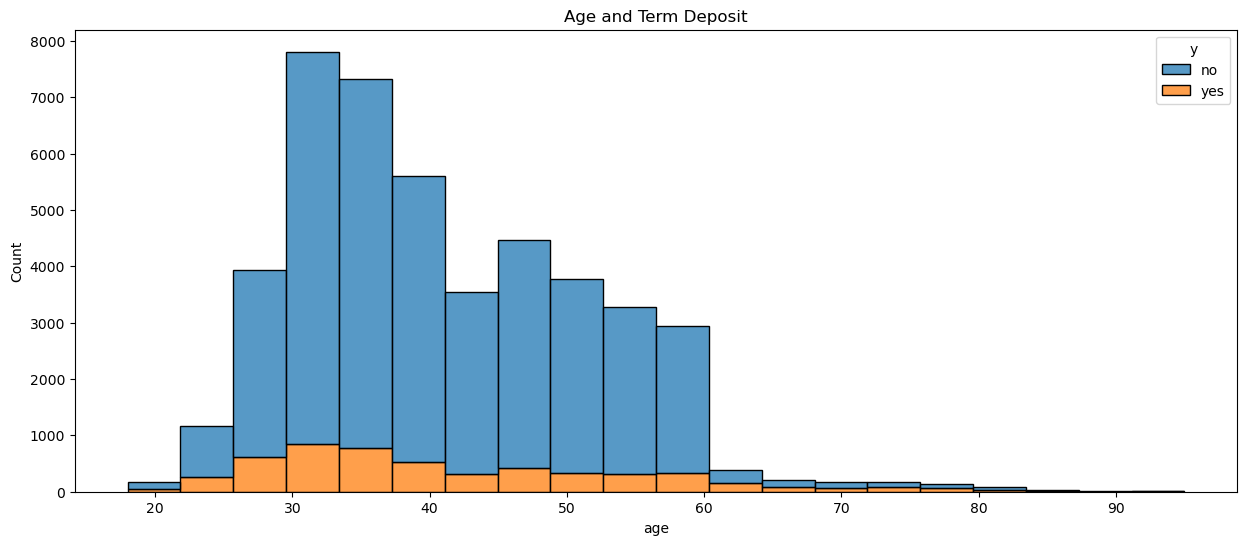

In [16]:
plt.figure(figsize=(15,6))
sns.histplot(data=port_fi, x='age', hue='y', bins=20, multiple='stack')

plt.title("Age and Term Deposit")
plt.show()

### Observation
- Most people tend to invest in the term deposit around the ages of 25-40 which makes sense because that's around the time when most people tend to plan for their retirements or some future plans which requires a substantial amount and investing in a term deposit gets for a longer period of time from a young age gets them that amount and provides security.

In [17]:
port_fi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<function matplotlib.pyplot.show(close=None, block=None)>

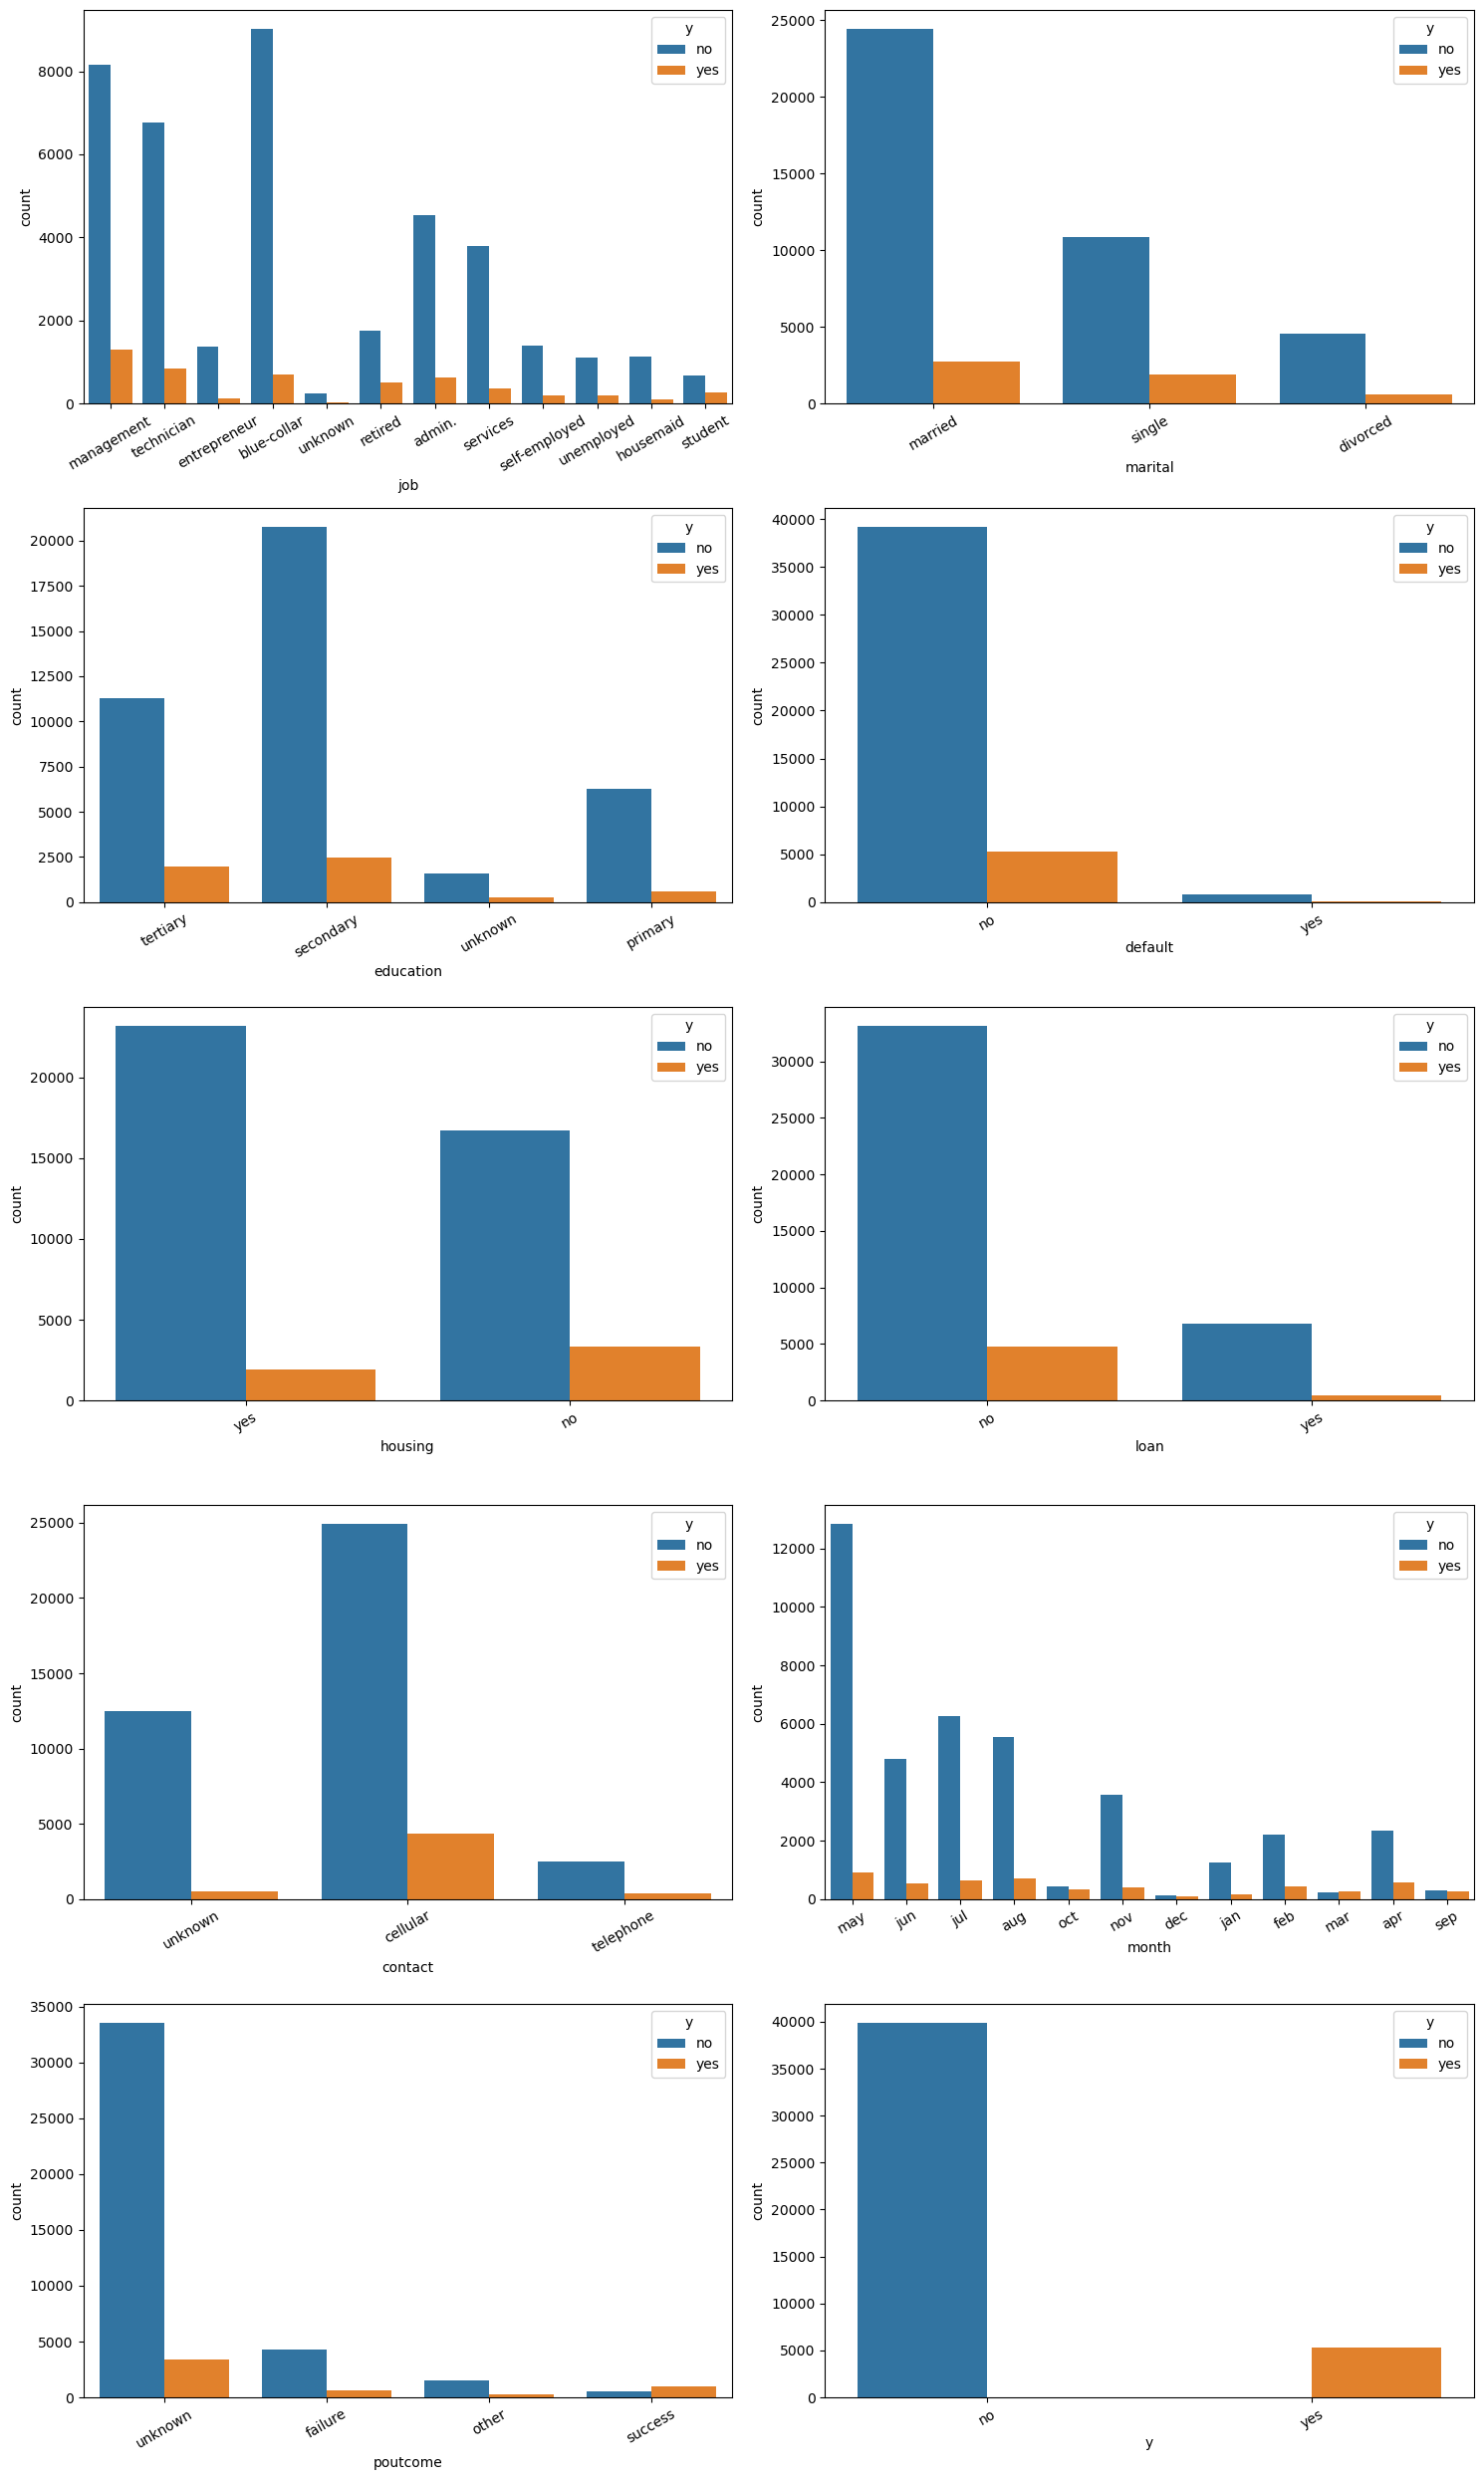

In [18]:
plt.figure(figsize=(15,25))

cat_cols = port_fi.select_dtypes(include=object).columns

for index, column in enumerate(cat_cols, start=1):
    plt.subplot(int((len(cat_cols)/2)), 2, index)
    sns.countplot(x=column, data=port_fi, hue='y')
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show

### Observations

1. People in the management sector were the highest in getting a term deposit with technician being the second.
2. Married people were the highest in getting a term deposit with single being the second followed by divorced.
3. People educated till the secondary education were the highest in getting a term deposit with tertiary educated people being the second.
4. People who don't have a default in their credit were the highest in getting a term deposit.
5. People who don't have a loan be it personal or a home loan have gotten a term deposit more than people who have a loan.
6. People got the most term deposit in the month of May.

In [19]:
y_encoded = port_fi['y'].replace({'no':0,'yes':1}).astype(int)
port_fi['y_encoded'] = y_encoded

port_fi.drop(['y'], axis=1, inplace=True)
port_fi.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_encoded
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


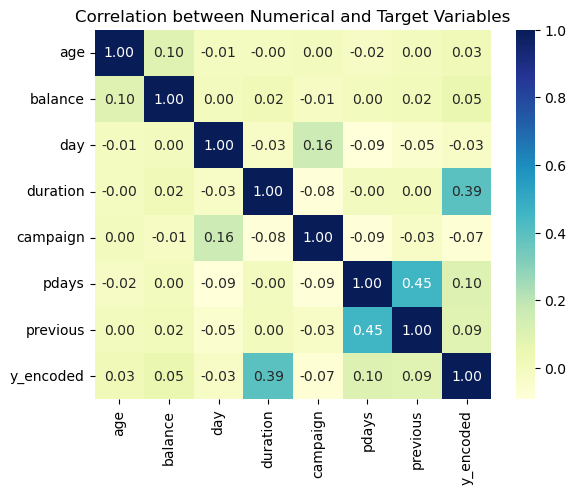

In [20]:
sns.heatmap(port_fi.corr(), annot=True, cmap='YlGnBu', fmt='.2f')

plt.title("Correlation between Numerical and Target Variables")
plt.show()

### Observations

- We can say there isn't any strong relationship between any of the input features and the target variable. 
- The highest strongest co-relation with the target variable is of the duration column with a value of 0.39

In [21]:
port_fi.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_encoded
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


## Building ML Models:

1. Logistic Regression
2. Decision Tree
3. Random Forest

### Splitting the dataset

In [22]:
# Making a copy of the dataframe
df = port_fi.copy(deep=True)

X = df.drop(['y_encoded'], axis=1)
y = df['y_encoded']

In [23]:
df.shape

(45211, 17)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (36168, 16)
X_test shape: (9043, 16)
y_train shape: (36168,)
y_test shape: (9043,)


### Encoding categorical columns

In [25]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

oh_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore').set_output(transform='pandas')
st_scaler = StandardScaler().set_output(transform='pandas')

columns_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
columns_to_scale = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

X_train_encoded = oh_encoder.fit_transform(X_train[columns_to_encode])
X_test_encoded = oh_encoder.fit_transform(X_test[columns_to_encode])

X_train_scaled = st_scaler.fit_transform(X_train[['age', 'balance', 'day', 'duration', 'campaign', 'pdays']])
X_test_scaled = st_scaler.fit_transform(X_test[['age', 'balance', 'day', 'duration', 'campaign', 'pdays']])

In [26]:
X_train_encoded.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
3344,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10221,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
X_test_encoded.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
3776,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9928,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31885,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15738,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
X_train_scaled.head()

,age,balance,day,duration,campaign,pdays
3344,0.006515,-0.169381,-0.098218,-0.719756,-0.565886,-0.411364
17965,0.759937,0.017848,1.703422,0.047138,-0.245389,-0.411364
18299,0.100693,0.820681,1.823532,-0.493970,0.395606,-0.411364
10221,-0.370196,-0.489588,-0.578656,0.459781,2.639088,-0.411364
32192,1.419181,0.706889,-0.098218,0.027674,-0.245389,-0.411364


In [29]:
X_test_scaled.head()

,age,balance,day,duration,campaign,pdays
3776,-0.090182,-0.251495,0.028748,-0.274013,-0.584037,-0.411810
9928,0.568933,0.727425,-0.813735,-0.693205,-0.251557,-0.411810
33409,-1.502571,-0.264914,0.510167,-0.143256,-0.584037,-0.411810
31885,0.098137,0.129657,-0.813735,0.183637,-0.584037,2.951021
15738,1.416366,-0.367471,0.630521,-0.547065,-0.251557,-0.411810


In [30]:
X_train = pd.concat([X_train_encoded, X_train_scaled], axis=1)
X_train.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_sep,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays
3344,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.006515,-0.169381,-0.098218,-0.719756,-0.565886,-0.411364
17965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.759937,0.017848,1.703422,0.047138,-0.245389,-0.411364
18299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.100693,0.820681,1.823532,-0.493970,0.395606,-0.411364
10221,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.370196,-0.489588,-0.578656,0.459781,2.639088,-0.411364
32192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.419181,0.706889,-0.098218,0.027674,-0.245389,-0.411364


In [31]:
X_test = pd.concat([X_test_encoded, X_test_scaled], axis=1)
X_test.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_sep,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays
3776,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.090182,-0.251495,0.028748,-0.274013,-0.584037,-0.411810
9928,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.568933,0.727425,-0.813735,-0.693205,-0.251557,-0.411810
33409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.502571,-0.264914,0.510167,-0.143256,-0.584037,-0.411810
31885,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.098137,0.129657,-0.813735,0.183637,-0.584037,2.951021
15738,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.416366,-0.367471,0.630521,-0.547065,-0.251557,-0.411810


### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

log_reg = LogisticRegression()

model = log_reg.fit(X_train, y_train)
ypred = log_reg.predict(X_test)

In [33]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [34]:
metrics.confusion_matrix(y_true=y_test, y_pred=ypred)

array([[7758,  194],
       [ 723,  368]], dtype=int64)

In [35]:
print(metrics.classification_report(y_true=y_test, y_pred=ypred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043



In [36]:
prob_1 = model.predict_proba(X_test)[:,1]

In [37]:
metrics.roc_auc_score(y_true=y_test, y_score=prob_1)

0.9043331944001314

In [38]:
log_reg_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=ypred)
log_reg_precision = metrics.precision_score(y_true=y_test, y_pred=ypred)
log_reg_recall = metrics.recall_score(y_true=y_test, y_pred=ypred)

### Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()

model = dec_tree.fit(X_train, y_train)
ypred = dec_tree.predict(X_test)

In [40]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [41]:
print(metrics.classification_report(y_true=y_test, y_pred=ypred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.49      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.71      0.71      9043
weighted avg       0.88      0.87      0.87      9043



In [42]:
dec_tree_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=ypred)
dec_tree_precision = metrics.precision_score(y_true=y_test, y_pred=ypred)
dec_tree_recall = metrics.recall_score(y_true=y_test, y_pred=ypred)

### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier()

model = rand_forest.fit(X_train, y_train)
ypred = rand_forest.predict(X_test)

In [44]:
rand_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [45]:
print(metrics.classification_report(y_true=y_test, y_pred=ypred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.67      0.41      0.51      1091

    accuracy                           0.90      9043
   macro avg       0.80      0.69      0.73      9043
weighted avg       0.89      0.90      0.89      9043



In [46]:
rand_forest_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=ypred)
rand_forest_precision = metrics.precision_score(y_true=y_test, y_pred=ypred)
rand_forest_recall = metrics.recall_score(y_true=y_test, y_pred=ypred)

In [47]:
metrics_dict = {
    'accuracy': {
        'logistic regression':log_reg_accuracy,
        'decision tree': dec_tree_accuracy,
        'random forest': rand_forest_accuracy
    },
    'precision': {
        'logistic regression':log_reg_precision,
        'decision tree': dec_tree_precision,
        'random forest': rand_forest_precision
    },
    'recall': {
        'logistic regression':log_reg_recall,
        'decision tree': dec_tree_recall,
        'random forest': rand_forest_recall
    }
}

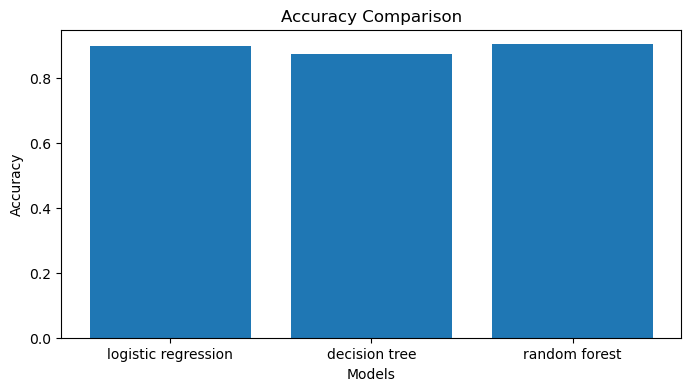

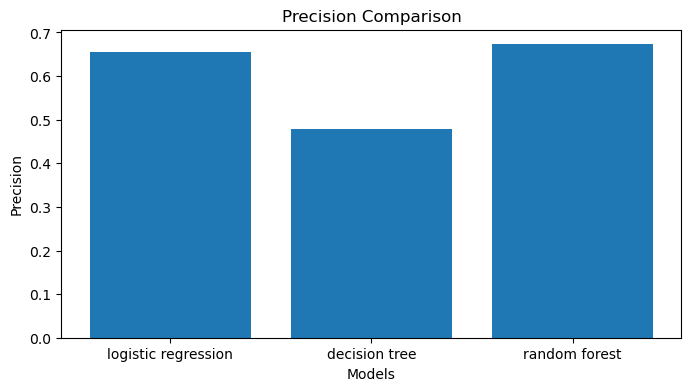

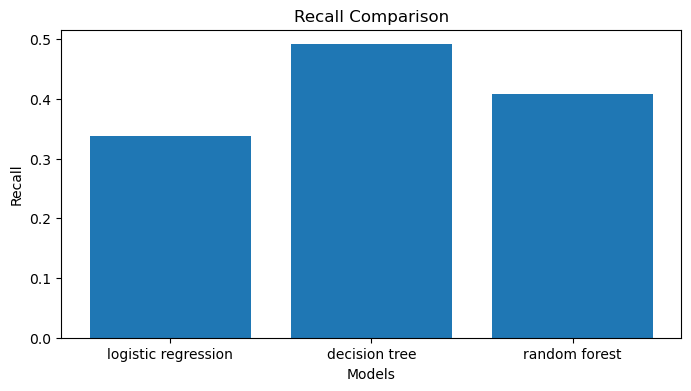

In [48]:
for metric, models in metrics_dict.items():
    model_names = list(models.keys())
    model_values = list(models.values())

    plt.figure(figsize=(8,4))
    plt.bar(model_names, model_values)
    plt.title(f"{metric.capitalize()} Comparison")
    plt.xlabel("Models")
    plt.ylabel(metric.capitalize())
    plt.show()

### Observations

#### For the untreated dataset we can see that:
- Accuracy: Logistic Regression (Log Reg), Decision Tree (DT), and Random Forest (RF) exhibit similar accuracy levels.
- Precision: Log Reg and RF demonstrate comparable precision, while DT lags behind.
- Recall: DT achieves the highest recall, followed by RF, with Log Reg having the lowest recall.

#### Implications:
- Precision Analysis: Log Reg and RF excel in correctly identifying true positives out of all predicted positives, indicating their ability to predict customer subscriptions accurately.
- Recall Analysis: DT excels in correctly identifying customer subscriptions when they indeed occur, showcasing its strength in capturing positive instances.

## Let's try building the same models by processing our data a bit differently to see if we can improve these metrics

In [49]:
port_fi_copy = port_fi.copy(deep=True)

In [50]:
port_fi.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_encoded
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [51]:
port_fi.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959


In [52]:
port_fi.describe()

,age,balance,day,duration,campaign,pdays,previous,y_encoded
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


### Feature Engineering

In [53]:
port_fi['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [54]:
port_fi['previous'].value_counts().sort_index()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
14        19
15        20
16        13
17        15
18         6
19        11
20         8
21         4
22         6
23         8
24         5
25         4
26         2
27         5
28         2
29         4
30         3
32         1
35         1
37         2
38         2
40         1
41         1
51         1
55         1
58         1
275        1
Name: previous, dtype: int64

In [55]:
port_fi['pdays'].value_counts().sort_index()

-1      36954
 1         15
 2         37
 3          1
 4          2
        ...  
 838        1
 842        1
 850        1
 854        1
 871        1
Name: pdays, Length: 559, dtype: int64

In [56]:
np.sort(port_fi['pdays'].unique())

array([ -1,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  12,  13,
        14,  15,  17,  18,  19,  20,  21,  22,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 18

In [57]:
port_fi['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64

In [58]:
port_fi['day'].value_counts().sort_index()

1      322
2     1293
3     1079
4     1445
5     1910
6     1932
7     1817
8     1842
9     1561
10     524
11    1479
12    1603
13    1585
14    1848
15    1703
16    1415
17    1939
18    2308
19    1757
20    2752
21    2026
22     905
23     939
24     447
25     840
26    1035
27    1121
28    1830
29    1745
30    1566
31     643
Name: day, dtype: int64

In [59]:
port_fi.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_encoded
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [60]:
port_fi['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [61]:
port_fi['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [62]:
port_fi['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

### Observations

- Since we don't know the outcome under `poutcome` of `unknown` and `other`, we are going to club them together under `other` column.
- Sort out `previous` into 5 categories, 0-9, 10-19, 20-29,30-,39, over 40.
- Sort out `pdays` into 5 categories, not_contacted, 0-14, 15-29, 30-44, over 45.
- Sort out `campaign` into 4 categories, 0-9, 10-19, 20-29, over 30.
- Sort out `day` into 2 categories under 15 days and over 15 days.
- Combine `cellular` and `telephone` into 1 category `mobile`.
- Fill in the `unknown` with the mode value in `education` dataset.
- Under `job` let's club `entrepreneur` and `self-employed` together, `technician`, `services`, and `housemaid` together.

#### Since we don't know the outcome under `poutcome` of `unknown` and `other`, we are going to club them together under `other` column.

In [63]:
port_fi['poutcome'] = port_fi['poutcome'].replace({'unknown':'other'})

#### Sort out `previous` into 5 categories, 0-9, 10-19, 20-29,30-,39, over 40.

In [64]:
def sort_previous(column):
    """"
    Sorts out the previous column into categories
    """
    if column<10:
        return '0-9'
    elif column<20:
        return '10-19'
    elif column<30:
        return '20-29'
    elif column<40:
        return '30-39'
    else:
        return 'over 40'

In [65]:
port_fi['previous_cat'] = port_fi['previous'].apply(sort_previous)
port_fi.drop(['previous'], axis=1, inplace=True)

#### Sort out `pdays` into 5 categories, not_contacted, 0-14, 15-29, 30-44, over 45.

In [66]:
def sort_pdays(column):
    """"
    Sorts out the previous column into categories
    """
    if column<15:
        return '0-14'
    elif column<30:
        return '15-29'
    elif column<45:
        return '30-44'
    else:
        return 'over 45'

In [67]:
port_fi['pdays_cat'] = port_fi['pdays'].apply(sort_pdays)
port_fi.drop(['pdays'], axis=1, inplace=True)

#### Sort out `campaign` into 4 categories, 0-9, 10-19, 20-29, over 30.

In [68]:
def sort_campaign(column):
    """"
    Sorts out the previous column into categories
    """
    if column<10:
        return '0-9'
    elif column<20:
        return '10-19'
    elif column<30:
        return '20-29'
    else:
        return 'over 30'

In [69]:
port_fi['campaign_cat'] = port_fi['campaign'].apply(sort_campaign)
port_fi.drop(['campaign'], axis=1, inplace=True)

#### Sort out `day` into 2 categories under 15 days and over 15 days.

In [70]:
port_fi['day_cat'] = pd.cut(port_fi['day'], bins=[1,15,31], labels=['>15', '<15'])
port_fi.drop(['day'], axis=1, inplace=True)

#### Combine `cellular` and `telephone` into 1 category `mobile`.

In [71]:
port_fi['contact'] = port_fi['contact'].map({'cellular':'mobile', 'telephone':'mobile', 'unknown':'unknown'})

#### Fill in the `unknown` with the mode value in `education` dataset.

In [72]:
port_fi['education'] = port_fi['education'].replace({'unknown':'secondary'})

#### Under `job` let's club `entrepreneur` and `self-employed` together, `technician`, `services`, and `housemaid` together.

In [73]:
port_fi['job'] = port_fi['job'].replace({'self-employed':'entrepreneur', 'technician':'services', 'housemaid':'services'})

In [74]:
port_fi.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,poutcome,y_encoded,previous_cat,pdays_cat,campaign_cat,day_cat
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,261,other,0,0-9,0-14,0-9,>15
1,44,services,single,secondary,no,29,yes,no,unknown,may,151,other,0,0-9,0-14,0-9,>15
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,76,other,0,0-9,0-14,0-9,>15
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,may,92,other,0,0-9,0-14,0-9,>15
4,33,unknown,single,secondary,no,1,no,no,unknown,may,198,other,0,0-9,0-14,0-9,>15


In [75]:
port_fi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           45211 non-null  int64   
 1   job           45211 non-null  object  
 2   marital       45211 non-null  object  
 3   education     45211 non-null  object  
 4   default       45211 non-null  object  
 5   balance       45211 non-null  int64   
 6   housing       45211 non-null  object  
 7   loan          45211 non-null  object  
 8   contact       45211 non-null  object  
 9   month         45211 non-null  object  
 10  duration      45211 non-null  int64   
 11  poutcome      45211 non-null  object  
 12  y_encoded     45211 non-null  int32   
 13  previous_cat  45211 non-null  object  
 14  pdays_cat     45211 non-null  object  
 15  campaign_cat  45211 non-null  object  
 16  day_cat       44889 non-null  category
dtypes: category(1), int32(1), int64(3), object(12)
mem

In [76]:
port_fi.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,poutcome,previous_cat,pdays_cat,campaign_cat
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,9,3,3,2,2,2,2,12,3,5,4,4
top,services,married,secondary,no,yes,no,mobile,may,other,0-9,0-14,0-9
freq,12991,27214,25059,44396,25130,37967,32191,13766,38799,44850,37102,43749


In [77]:
port_fi.describe()

,age,balance,duration,y_encoded
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,0.116985
std,10.618762,3044.765829,257.527812,0.321406
min,18.000000,-8019.000000,0.000000,0.000000
25%,33.000000,72.000000,103.000000,0.000000
50%,39.000000,448.000000,180.000000,0.000000
75%,48.000000,1428.000000,319.000000,0.000000
max,95.000000,102127.000000,4918.000000,1.000000


### Checking outliers and correlation of age with the target variable

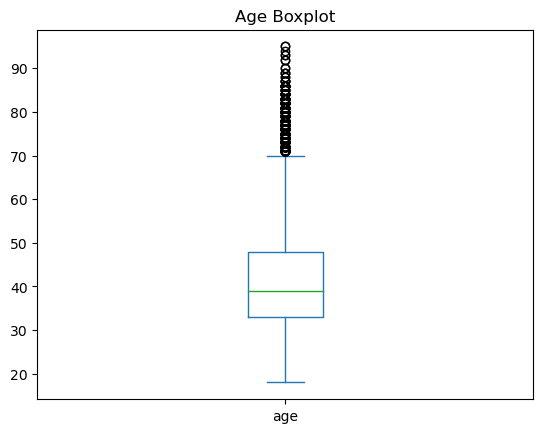

In [78]:
port_fi['age'].plot(kind='box')

plt.title("Age Boxplot")
plt.show()

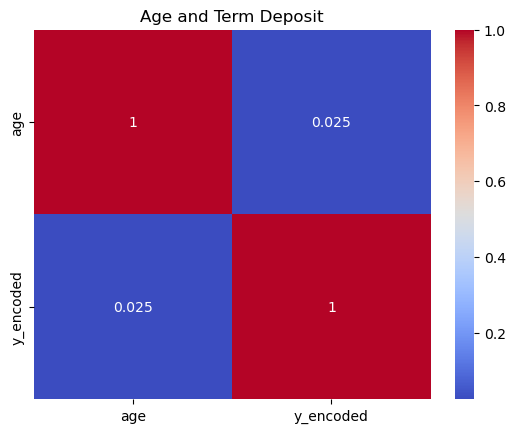

In [79]:
sns.heatmap(data=df[['age', 'y_encoded']].corr(), cmap='coolwarm', annot=True)

plt.title("Age and Term Deposit")
plt.show()

### Since no strong correlation, converting the age into categories

In [80]:
port_fi['age'].nunique()

77

In [81]:
np.sort(port_fi['age'].unique())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 92, 93, 94, 95], dtype=int64)

In [82]:
def sort_age(column):
    """
    Categorizes the age column of the dataframe
    """
    if column<30:
        return "18-29"
    elif column<45:
        return "30-44"
    elif column<60:
        return "45-59"
    elif column<75:
        return "60-75"
    else:
        return "over 75"

In [83]:
port_fi['age_cat'] = port_fi['age'].apply(sort_age)

In [84]:
port_fi.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,poutcome,y_encoded,previous_cat,pdays_cat,campaign_cat,day_cat,age_cat
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,261,other,0,0-9,0-14,0-9,>15,45-59
1,44,services,single,secondary,no,29,yes,no,unknown,may,151,other,0,0-9,0-14,0-9,>15,30-44
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,76,other,0,0-9,0-14,0-9,>15,30-44
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,may,92,other,0,0-9,0-14,0-9,>15,45-59
4,33,unknown,single,secondary,no,1,no,no,unknown,may,198,other,0,0-9,0-14,0-9,>15,30-44


In [85]:
age_term_deposit_percent = port_fi.groupby('age_cat')['y_encoded'].mean()

In [86]:
age_term_deposit_percent

age_cat
18-29      0.175991
30-44      0.101178
45-59      0.094020
60-75      0.315364
over 75    0.440000
Name: y_encoded, dtype: float64

In [87]:
port_fi['tdep_per_age'] = port_fi['age_cat'].map(age_term_deposit_percent)

In [88]:
port_fi.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,poutcome,y_encoded,previous_cat,pdays_cat,campaign_cat,day_cat,age_cat,tdep_per_age
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,261,other,0,0-9,0-14,0-9,>15,45-59,0.094020
1,44,services,single,secondary,no,29,yes,no,unknown,may,151,other,0,0-9,0-14,0-9,>15,30-44,0.101178
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,76,other,0,0-9,0-14,0-9,>15,30-44,0.101178
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,may,92,other,0,0-9,0-14,0-9,>15,45-59,0.094020
4,33,unknown,single,secondary,no,1,no,no,unknown,may,198,other,0,0-9,0-14,0-9,>15,30-44,0.101178


In [89]:
def sort_age_perc(column):
    """
    Categorizes term deposit percentage based on age column
    """
    if column<0.33:
        return "Low Conversion"
    elif column<0.67:
        return "Medium Conversion"
    else:
        return "High Conversion"

In [90]:
port_fi['tdep_conversion_age'] = port_fi['tdep_per_age'].apply(sort_age_perc)

In [91]:
port_fi.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,poutcome,y_encoded,previous_cat,pdays_cat,campaign_cat,day_cat,age_cat,tdep_per_age,tdep_conversion_age
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,261,other,0,0-9,0-14,0-9,>15,45-59,0.094020,Low Conversion
1,44,services,single,secondary,no,29,yes,no,unknown,may,151,other,0,0-9,0-14,0-9,>15,30-44,0.101178,Low Conversion
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,76,other,0,0-9,0-14,0-9,>15,30-44,0.101178,Low Conversion
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,may,92,other,0,0-9,0-14,0-9,>15,45-59,0.094020,Low Conversion
4,33,unknown,single,secondary,no,1,no,no,unknown,may,198,other,0,0-9,0-14,0-9,>15,30-44,0.101178,Low Conversion


In [92]:
port_fi.drop(['age', 'tdep_per_age'], axis=1, inplace=True)
port_fi.head()

,job,marital,education,default,balance,housing,loan,contact,month,duration,poutcome,y_encoded,previous_cat,pdays_cat,campaign_cat,day_cat,age_cat,tdep_conversion_age
0,management,married,tertiary,no,2143,yes,no,unknown,may,261,other,0,0-9,0-14,0-9,>15,45-59,Low Conversion
1,services,single,secondary,no,29,yes,no,unknown,may,151,other,0,0-9,0-14,0-9,>15,30-44,Low Conversion
2,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,76,other,0,0-9,0-14,0-9,>15,30-44,Low Conversion
3,blue-collar,married,secondary,no,1506,yes,no,unknown,may,92,other,0,0-9,0-14,0-9,>15,45-59,Low Conversion
4,unknown,single,secondary,no,1,no,no,unknown,may,198,other,0,0-9,0-14,0-9,>15,30-44,Low Conversion


In [93]:
port_fi.head()

,job,marital,education,default,balance,housing,loan,contact,month,duration,poutcome,y_encoded,previous_cat,pdays_cat,campaign_cat,day_cat,age_cat,tdep_conversion_age
0,management,married,tertiary,no,2143,yes,no,unknown,may,261,other,0,0-9,0-14,0-9,>15,45-59,Low Conversion
1,services,single,secondary,no,29,yes,no,unknown,may,151,other,0,0-9,0-14,0-9,>15,30-44,Low Conversion
2,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,76,other,0,0-9,0-14,0-9,>15,30-44,Low Conversion
3,blue-collar,married,secondary,no,1506,yes,no,unknown,may,92,other,0,0-9,0-14,0-9,>15,45-59,Low Conversion
4,unknown,single,secondary,no,1,no,no,unknown,may,198,other,0,0-9,0-14,0-9,>15,30-44,Low Conversion


### Converting Month into Quarters

In [94]:
month_dict = {('jan', 'feb', 'mar'): 'Q1'}

In [95]:
month_dict = {'jan':'Q1', 'feb':'Q1', 'mar':'Q1', 
              'apr':'Q2', 'may':'Q2','jun':'Q2', 
              'jul':'Q3', 'aug':'Q3','sep':'Q3', 
              'oct':'Q4', 'nov':'Q4', 'dec':'Q4'}

port_fi['month_cat'] = port_fi['month'].map(month_dict)

In [96]:
port_fi.drop(['month'],axis=1, inplace=True)

### Checking outliers balance and duration

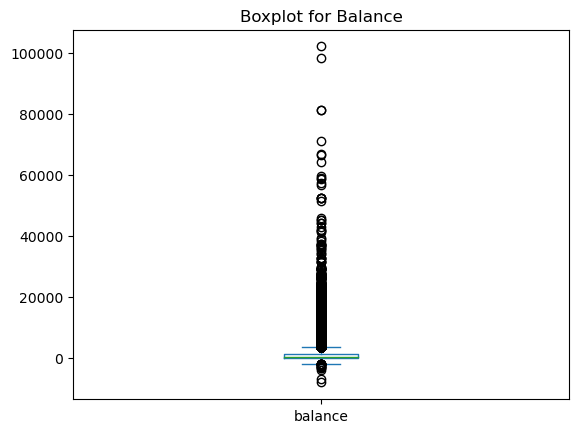

In [97]:
port_fi['balance'].plot(kind='box')

plt.title("Boxplot for Balance")
plt.show()

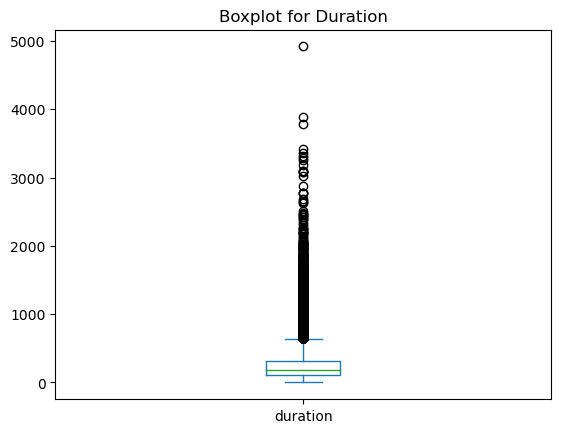

In [98]:
port_fi['duration'].plot(kind='box')

plt.title("Boxplot for Duration")
plt.show()

### Will scale down the Balance and Duration Column

In [99]:
port_fi

,job,marital,education,default,balance,housing,loan,contact,duration,poutcome,y_encoded,previous_cat,pdays_cat,campaign_cat,day_cat,age_cat,tdep_conversion_age,month_cat
0,management,married,tertiary,no,2143,yes,no,unknown,261,other,0,0-9,0-14,0-9,>15,45-59,Low Conversion,Q2
1,services,single,secondary,no,29,yes,no,unknown,151,other,0,0-9,0-14,0-9,>15,30-44,Low Conversion,Q2
2,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,other,0,0-9,0-14,0-9,>15,30-44,Low Conversion,Q2
3,blue-collar,married,secondary,no,1506,yes,no,unknown,92,other,0,0-9,0-14,0-9,>15,45-59,Low Conversion,Q2
4,unknown,single,secondary,no,1,no,no,unknown,198,other,0,0-9,0-14,0-9,>15,30-44,Low Conversion,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,services,married,tertiary,no,825,no,no,mobile,977,other,1,0-9,0-14,0-9,<15,45-59,Low Conversion,Q4
45207,retired,divorced,primary,no,1729,no,no,mobile,456,other,1,0-9,0-14,0-9,<15,60-75,Low Conversion,Q4
45208,retired,married,secondary,no,5715,no,no,mobile,1127,success,1,0-9,over 45,0-9,<15,60-75,Low Conversion,Q4
45209,blue-collar,married,secondary,no,668,no,no,mobile,508,other,0,0-9,0-14,0-9,<15,45-59,Low Conversion,Q4


## Splitting the Dataset and building the model again

In [100]:
X = port_fi.drop(['y_encoded'], axis=1)
y = port_fi['y_encoded']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (36168, 17)
X_test shape: (9043, 17)
y_train shape: (36168,)
y_test shape: (9043,)


In [102]:
X_train_copy = X_train.copy(deep=True)
X_test_copy = X_test.copy(deep=True)

In [103]:
X_train.head()

,job,marital,education,default,balance,housing,loan,contact,duration,poutcome,previous_cat,pdays_cat,campaign_cat,day_cat,age_cat,tdep_conversion_age,month_cat
3344,blue-collar,married,primary,no,849,yes,no,unknown,72,other,0-9,0-14,0-9,>15,30-44,Low Conversion,Q2
17965,services,married,primary,no,1415,yes,no,mobile,269,other,0-9,0-14,0-9,<15,45-59,Low Conversion,Q3
18299,admin.,married,secondary,no,3842,no,no,mobile,130,other,0-9,0-14,0-9,<15,30-44,Low Conversion,Q3
10221,management,single,tertiary,no,-119,yes,no,unknown,375,other,0-9,0-14,10-19,>15,30-44,Low Conversion,Q2
32192,blue-collar,married,primary,no,3498,no,no,mobile,264,other,0-9,0-14,0-9,>15,45-59,Low Conversion,Q2


In [104]:
columns_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month_cat',
                    'poutcome', 'previous_cat', 'pdays_cat', 'campaign_cat', 'day_cat', 'age_cat', 'tdep_conversion_age']
columns_to_scale = ['balance', 'duration']

In [105]:
col_encoded = oh_encoder.fit_transform(X_train[columns_to_encode])
col_encoded

,job_blue-collar,job_entrepreneur,job_management,job_retired,job_services,job_student,job_unemployed,job_unknown,marital_married,marital_single,...,campaign_cat_10-19,campaign_cat_20-29,campaign_cat_over 30,day_cat_>15,day_cat_nan,age_cat_30-44,age_cat_45-59,age_cat_60-75,age_cat_over 75,tdep_conversion_age_Medium Conversion
3344,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
17965,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
18299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10221,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
32192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
44732,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
38158,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [106]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler().set_output(transform='pandas')

col_scaled = mm_scaler.fit_transform(X_train[columns_to_scale])
col_scaled

,balance,duration
3344,0.080511,0.014640
17965,0.085650,0.054697
18299,0.107684,0.026434
10221,0.071723,0.076251
32192,0.104561,0.053680
...,...,...
11284,0.082418,0.425580
44732,0.077415,0.042700
38158,0.084760,0.048597
860,0.074301,0.022570


In [107]:
test_col_encoded = oh_encoder.fit_transform(X_test[columns_to_encode])
test_col_scaled = mm_scaler.fit_transform(X_test[columns_to_scale])

In [108]:
X_train = pd.concat([col_encoded, col_scaled], axis=1)

In [109]:
X_test = pd.concat([test_col_encoded, test_col_scaled], axis=1)

In [110]:
X_train.head()

,job_blue-collar,job_entrepreneur,job_management,job_retired,job_services,job_student,job_unemployed,job_unknown,marital_married,marital_single,...,campaign_cat_over 30,day_cat_>15,day_cat_nan,age_cat_30-44,age_cat_45-59,age_cat_60-75,age_cat_over 75,tdep_conversion_age_Medium Conversion,balance,duration
3344,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.080511,0.014640
17965,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.085650,0.054697
18299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.107684,0.026434
10221,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.071723,0.076251
32192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.104561,0.053680


In [111]:
X_test.head()

,job_blue-collar,job_entrepreneur,job_management,job_retired,job_services,job_student,job_unemployed,job_unknown,marital_married,marital_single,...,campaign_cat_over 30,day_cat_>15,day_cat_nan,age_cat_30-44,age_cat_45-59,age_cat_60-75,age_cat_over 75,tdep_conversion_age_Medium Conversion,balance,duration
3776,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.032552,0.060320
9928,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.062850,0.026076
33409,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032137,0.071002
31885,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.044349,0.097707
15738,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.028963,0.038014


### Checking Class Imbalance

In [112]:
y_train.value_counts()

0    31970
1     4198
Name: y_encoded, dtype: int64

In [113]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy='minority')

X_resample, y_resample = smote.fit_resample(X_train,y_train)

In [114]:
y_resample.value_counts()

0    31970
1    31970
Name: y_encoded, dtype: int64

### Logistic Regression

In [115]:
log_reg = LogisticRegression(random_state=42)

model = log_reg.fit(X_resample, y_resample)
ypred = log_reg.predict(X_test)

print(metrics.confusion_matrix(y_true=y_test, y_pred=ypred))
print("--"*50)
print(metrics.classification_report(y_true=y_test, y_pred=ypred))

[[5708 2244]
 [  95  996]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.72      0.83      7952
           1       0.31      0.91      0.46      1091

    accuracy                           0.74      9043
   macro avg       0.65      0.82      0.64      9043
weighted avg       0.90      0.74      0.79      9043



In [116]:
model.predict_proba(X_test)

array([[0.94054741, 0.05945259],
       [0.9022804 , 0.0977196 ],
       [0.27449109, 0.72550891],
       ...,
       [0.89337775, 0.10662225],
       [0.96366216, 0.03633784],
       [0.85261716, 0.14738284]])

In [117]:
ypred

array([0, 0, 1, ..., 0, 0, 0])

In [118]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [119]:
prob_1 = model.predict_proba(X_test)[:,1]

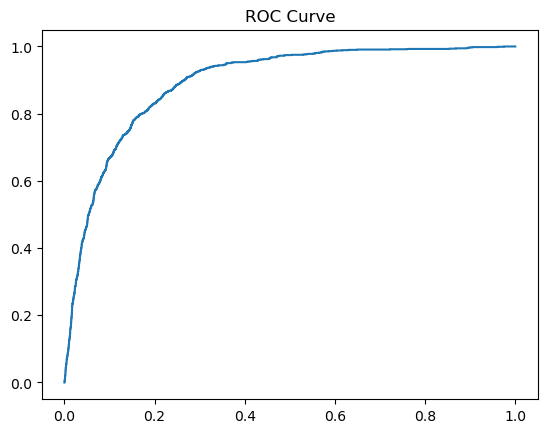

In [120]:
fpr, tpr, threshold = metrics.roc_curve(y_true=y_test, y_score=prob_1)

plt.plot(fpr, tpr)

plt.title('ROC Curve')
plt.show()

In [121]:
threshold

array([2.00000000e+00, 1.00000000e+00, 9.99999976e-01, ...,
       1.58014647e-02, 1.56225347e-02, 5.25129418e-04])

In [122]:
metrics.roc_auc_score(y_true=y_test, y_score=prob_1)

0.8933144006108142

In [123]:
log_reg_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=ypred)
log_reg_precision = metrics.precision_score(y_true=y_test, y_pred=ypred)
log_reg_recall = metrics.recall_score(y_true=y_test, y_pred=ypred)

### Decision Tree

In [124]:
dec_tree = DecisionTreeClassifier(random_state=42, max_depth=5)

model = dec_tree.fit(X_train, y_train)
ypred = dec_tree.predict(X_test)

print(metrics.confusion_matrix(y_true=y_test, y_pred=ypred))
print("--"*50)
print(metrics.classification_report(y_true=y_test, y_pred=ypred))

[[7454  498]
 [ 542  549]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7952
           1       0.52      0.50      0.51      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.72      0.72      9043
weighted avg       0.88      0.88      0.88      9043



In [125]:
dec_tree_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=ypred)
dec_tree_precision = metrics.precision_score(y_true=y_test, y_pred=ypred)
dec_tree_recall = metrics.recall_score(y_true=y_test, y_pred=ypred)

### Random Forest

In [126]:
rand_forest = RandomForestClassifier(random_state=42, max_depth=10)

model = rand_forest.fit(X_train, y_train)
ypred = rand_forest.predict(X_test)

print(metrics.classification_report(y_true=y_test, y_pred=ypred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.68      0.24      0.36      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.61      0.65      9043
weighted avg       0.88      0.90      0.87      9043



In [127]:
rand_forest_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=ypred)
rand_forest_precision = metrics.precision_score(y_true=y_test, y_pred=ypred)
rand_forest_recall = metrics.recall_score(y_true=y_test, y_pred=ypred)

In [128]:
metrics_dict = {
    'accuracy': {
        'logistic regression':log_reg_accuracy,
        'decision tree': dec_tree_accuracy,
        'random forest': rand_forest_accuracy
    },
    'precision': {
        'logistic regression':log_reg_precision,
        'decision tree': dec_tree_precision,
        'random forest': rand_forest_precision
    },
    'recall': {
        'logistic regression':log_reg_recall,
        'decision tree': dec_tree_recall,
        'random forest': rand_forest_recall
    }
}

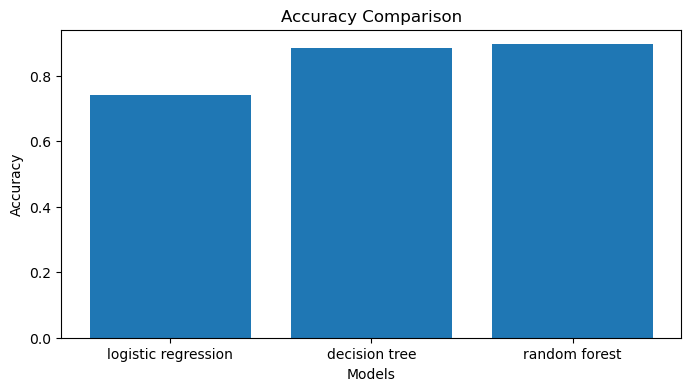

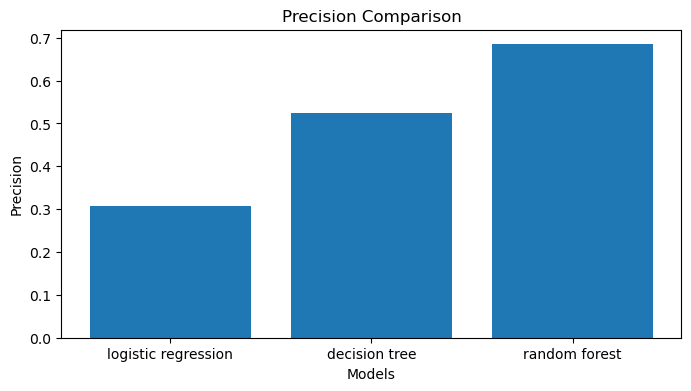

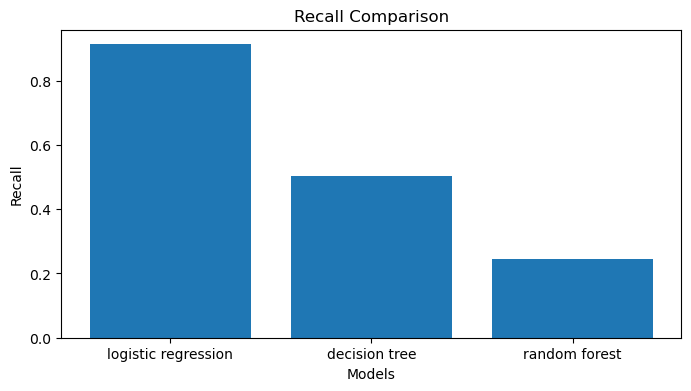

In [129]:
for metric, models in metrics_dict.items():
    model_names = list(models.keys())
    model_values = list(models.values())

    plt.figure(figsize=(8,4))
    plt.bar(model_names, model_values)
    plt.title(f"{metric.capitalize()} Comparison")
    plt.xlabel("Models")
    plt.ylabel(metric.capitalize())
    plt.show()

### Observations

#### For the treated dataset we can see that:
- Accuracy: Decision Tree (DT), and Random Forest (RF) exhibit similar accuracy levels whereas Logistic Regression (Log Reg) lags behind.
- Precision: RF demonstrates the highest precision followed by DT and Log Reg lags behind.
- Recall: Log Reg achieves the highest recall, followed by DT, with RT having the lowest recall.

#### Implications:
- Precision Analysis: Random Forest demonstrate strong performance in correctly identifying true positives out of all predicted positives. This suggests it's capability to accurately predict customer subscriptions.

- Recall Analysis: Logistic Regression excels in correctly identifying customer subscriptions when they indeed occur. This showcases its strength in capturing positive instances effectively.